In [1]:
%reset -f
%whos

Interactive namespace is empty.


In [4]:
%reset -f
%whos

#Misc
import time, os, sys, pdb
from glob import glob
from fnmatch import fnmatch

#Base
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.stats as st
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore

#Save
import json
import scipy.io as sio
import h5py

#Plot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cv2
from PIL import Image
from matplotlib import cm
from matplotlib.backends.backend_pdf import PdfPages
sns.set_style("ticks")

#Model
import ssm

#CCM
#from DelayEmbedding import DelayEmbedding as DE

#User
#import util
#import plotting as usrplt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Interactive namespace is empty.


In [5]:
from PyComplexHeatmap import *

In [6]:
#load bsoid transition matrices (csv)
import numpy as np

#Unpack dictionary into individual variables with same individual names as in previous session
from operator import itemgetter

def getList(dict):
    list = []
    for key in dict.keys():
        list.append(key)
          
    return list

bsoid_trans_dir=input("Enter full paths of .csv BSOID transition matrix files to load")

Enter full paths of .csv BSOID transition matrix files to load G:\uobrainflex_analysis_2022\A1V1M2\trans_mat_maps\smotif


In [7]:
from os import listdir
from os.path import isfile, join

#create list of bsoid_trans files
bsoid_trans_files = [f for f in listdir(bsoid_trans_dir) if isfile(join(bsoid_trans_dir, f))]

In [8]:
bsoid_trans_files

['Apr-20-2022transitions_mat_30Hz3056_200924_E235_0_rt_90min_cropDLC_resnet50_Sept17_rtSep17shuffle1_500000_SMOTIF.csv',
 'Apr-27-2022transitions_mat_30Hz_3056_200930_E235_0_rt_cam_concat_all_80min_cropDLC_resnet50_rtCam_Apr2622Apr26shuffle1_500000_SMOTIF.csv',
 'Dec-10-2022transitions_mat_30Hz3474_210104_E255_0_rt_all_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-13-2022transitions_mat_30Hz3474_210107_E255_1_rt_all_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-14-2022transitions_mat_30Hz3474_210111_E255_0_rt_all_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-18-2022transitions_mat_30Hz3474_210113_E255_2_rt_90min_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-20-2022transitions_mat_30Hz3474_210107_E255_0_rt_16min_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-22-2022transitions_mat_30Hz3474_210113_E255_1_rt_17min_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',


In [9]:
subs_E235='E235'
subs_E255='E255'

bsoid_trans_files_E235 = [i for i in bsoid_trans_files if subs_E235 in i]
bsoid_trans_files_E255 = [i for i in bsoid_trans_files if subs_E255 in i]

In [10]:
bsoid_trans_files_E235

['Apr-20-2022transitions_mat_30Hz3056_200924_E235_0_rt_90min_cropDLC_resnet50_Sept17_rtSep17shuffle1_500000_SMOTIF.csv',
 'Apr-27-2022transitions_mat_30Hz_3056_200930_E235_0_rt_cam_concat_all_80min_cropDLC_resnet50_rtCam_Apr2622Apr26shuffle1_500000_SMOTIF.csv',
 'Jun-16-2022transitions_mat_30Hz3056_200819_E235_1_rt_all_cropDLC_resnet50_3056_E235_ALL_singlePlane_May2522May25shuffle1_500000_SMOTIF.csv',
 'Jun-16-2022transitions_mat_30Hz3056_200821_E235_1_rt_all_cropDLC_resnet50_3056_E235_ALL_singlePlane_May2522May25shuffle1_500000_SMOTIF.csv',
 'Jun-17-2022transitions_mat_30Hz3056_200904_E235_1_rt_all_cropDLC_resnet50_3056_E235_ALL_singlePlane_May2522May25shuffle1_500000_SMOTIF.csv',
 'Jun-20-2022transitions_mat_30Hz3056_200923_E235_0_rt_all_cropDLC_resnet50_3056_E235_ALL_singlePlane_May2522May25shuffle1_500000_SMOTIF.csv',
 'Jun-22-2022transitions_mat_30Hz3056_201005_E235_1_rt_all_cropDLC_resnet50_3056_E235_ALL_singlePlane_May2522May25shuffle1_500000_SMOTIF.csv',
 'Jun-24-2022transition

In [11]:
bsoid_trans_files_E255

['Dec-10-2022transitions_mat_30Hz3474_210104_E255_0_rt_all_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-13-2022transitions_mat_30Hz3474_210107_E255_1_rt_all_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-14-2022transitions_mat_30Hz3474_210111_E255_0_rt_all_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-18-2022transitions_mat_30Hz3474_210113_E255_2_rt_90min_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-20-2022transitions_mat_30Hz3474_210107_E255_0_rt_16min_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Dec-22-2022transitions_mat_30Hz3474_210113_E255_1_rt_17min_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Jan-01-2023transitions_mat_30Hz3474_210121_E255_0_rt_90min_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Jan-05-2023transitions_mat_30Hz3474_210125_E255_0_rt_all_cropDLC_resnet50_A1V1M2_batch2Jun9shuffle1_500000_SMOTIF.csv',
 'Jan-10-2023tra

In [31]:
trans_mats_E235=np.zeros((len(bsoid_trans_files_E235),10,10),dtype='int')
trans_mats_E235_sum=np.zeros((10,10),dtype='int')
init_tot_E235=np.zeros((10),dtype='int')
dest_tot_E235=np.zeros((10),dtype='int')

for i in range(len(bsoid_trans_files_E235)):
    df = pd.read_csv(bsoid_trans_dir + "/" + bsoid_trans_files_E235[i])
    df_array=df.to_numpy()
    df_array_trunc=df_array[:,1:]
    trans_mats_E235[i,:,:]=df_array_trunc
    trans_mats_E235_sum=trans_mats_E235_sum+trans_mats_E235[i,:,:]
    
for i in range(10):
    for j in range(len(bsoid_trans_files_E235)+1):
        init_tot_E235[i]=init_tot_E235[i]+trans_mats_E235_sum[i,j]
        dest_tot_E235[i]=dest_tot_E235[i]+trans_mats_E235_sum[j,i]

In [53]:
print(init_tot_E235)
print('')
print(dest_tot_E235)

[ 58062  93902 169518  76568  12794  88254 112680  40426 200577  17486]

[ 58061  93900 169518  76569  12794  88254 112680  40427 200578  17486]


In [33]:
trans_mats_E255=np.zeros((len(bsoid_trans_files_E255),10,10),dtype='int')
trans_mats_E255_sum=np.zeros((10,10),dtype='int')
init_tot_E255=np.zeros((10),dtype='int')
dest_tot_E255=np.zeros((10),dtype='int')

for i in range(len(bsoid_trans_files_E255)):
    df = pd.read_csv(bsoid_trans_dir + "/" + bsoid_trans_files_E255[i])
    df_array=df.to_numpy()
    df_array_trunc=df_array[:,1:]
    trans_mats_E255[i,:,:]=df_array_trunc
    trans_mats_E255_sum=trans_mats_E255_sum+trans_mats_E255[i,:,:]
    
for i in range(10):
    for j in range(10):
        init_tot_E255[i]=init_tot_E255[i]+trans_mats_E255_sum[i,j]
        dest_tot_E255[i]=dest_tot_E255[i]+trans_mats_E255_sum[j,i]

In [54]:
print(init_tot_E255)
print('')
print(dest_tot_E255)

[ 93137  35745  27359  49506  22302  18486   1598  19402 750003 258474]

[ 93136  35745  27360  49506  22302  18486   1598  19401 750006 258472]


In [36]:
trans_mats_E235_probs=np.zeros((10,10),dtype='float')

for i in range(10):
    for j in range(10):
        trans_mats_E235_probs[i,j]=trans_mats_E235_sum[i,j]/dest_tot_E235[i]

In [37]:
trans_mats_E255_probs=np.zeros((10,10),dtype='float')

for i in range(10):
    for j in range(10):
        trans_mats_E255_probs[i,j]=trans_mats_E255_sum[i,j]/dest_tot_E255[i]

In [56]:
trans_mats_comb_sum=np.zeros((10,10),dtype='int')
init_tot_comb=np.zeros((10),dtype='int')
dest_tot_comb=np.zeros((10),dtype='int')

trans_mats_comb_sum=trans_mats_E235_sum+trans_mats_E255_sum
init_tot_comb=init_tot_E235+init_tot_E255
dest_tot_comb=dest_tot_E235+dest_tot_E255

In [57]:
trans_mats_comb_probs=np.zeros((10,10),dtype='float')

for i in range(10):
    for j in range(10):
        trans_mats_comb_probs[i,j]=trans_mats_comb_sum[i,j]/dest_tot_comb[i]
        
trans_mats_comb_diag_zero=trans_mats_comb_probs.copy()

for i in range(10):
    for j in range(10):
        if trans_mats_comb_diag_zero[i,j]>0.9:
            trans_mats_comb_diag_zero[i,j]=0

In [40]:
trans_mats_E235_diag_zero=trans_mats_E235_probs.copy()
trans_mats_E255_diag_zero=trans_mats_E255_probs.copy()

In [42]:
for i in range(10):
    for j in range(10):
        if trans_mats_E235_diag_zero[i,j]>0.9:
            trans_mats_E235_diag_zero[i,j]=0
            
for i in range(10):
    for j in range(10):
        if trans_mats_E255_diag_zero[i,j]>0.9:
            trans_mats_E255_diag_zero[i,j]=0

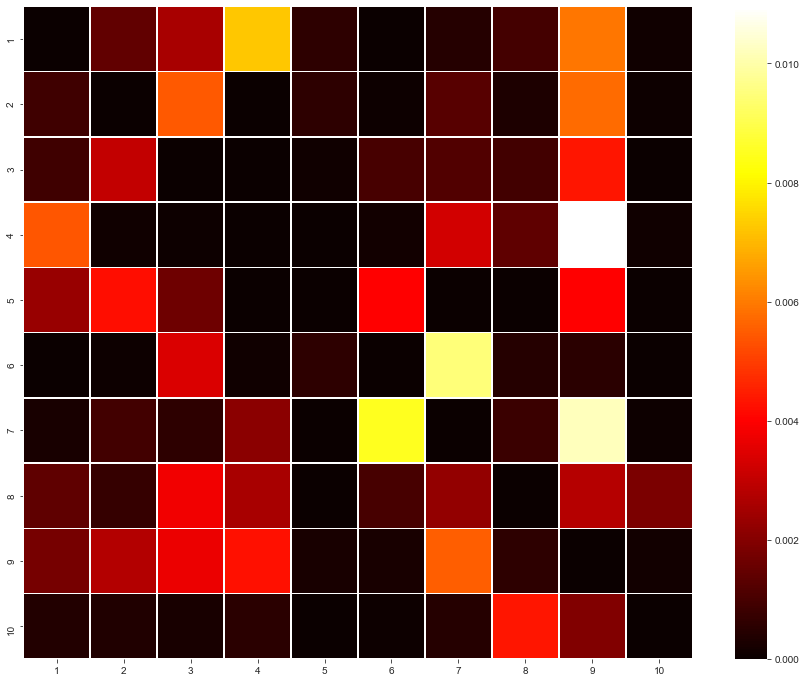

In [64]:
plt.figure(figsize = (15,12))
x_axis_labels=[1,2,3,4,5,6,7,8,9,10]
y_axis_labels=[1,2,3,4,5,6,7,8,9,10]
ax = sns.heatmap(trans_mats_E235_diag_zero,cmap='hot', linewidth=0.5,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

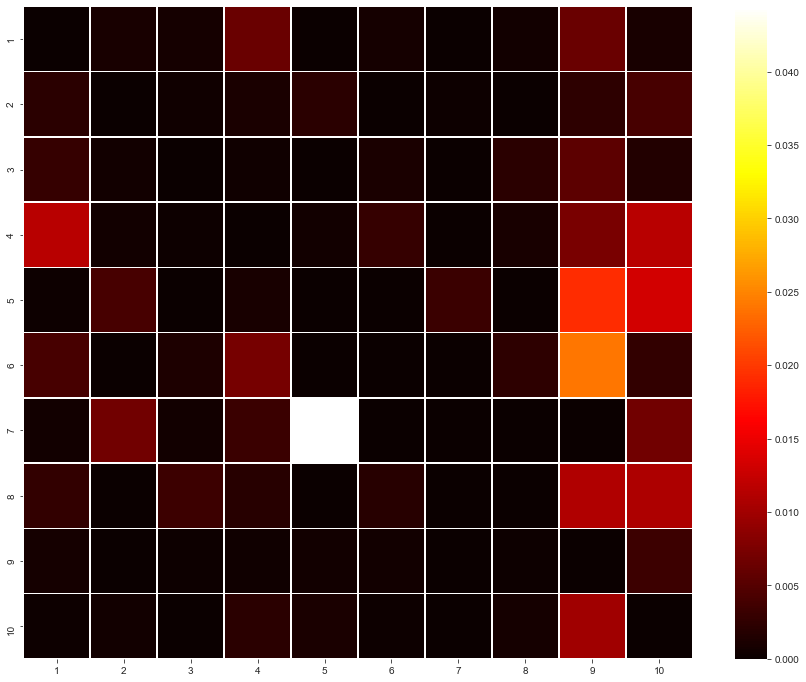

In [65]:
plt.figure(figsize = (15,12))
x_axis_labels=[1,2,3,4,5,6,7,8,9,10]
y_axis_labels=[1,2,3,4,5,6,7,8,9,10]
ax = sns.heatmap(trans_mats_E255_diag_zero,cmap='hot', linewidth=0.5,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

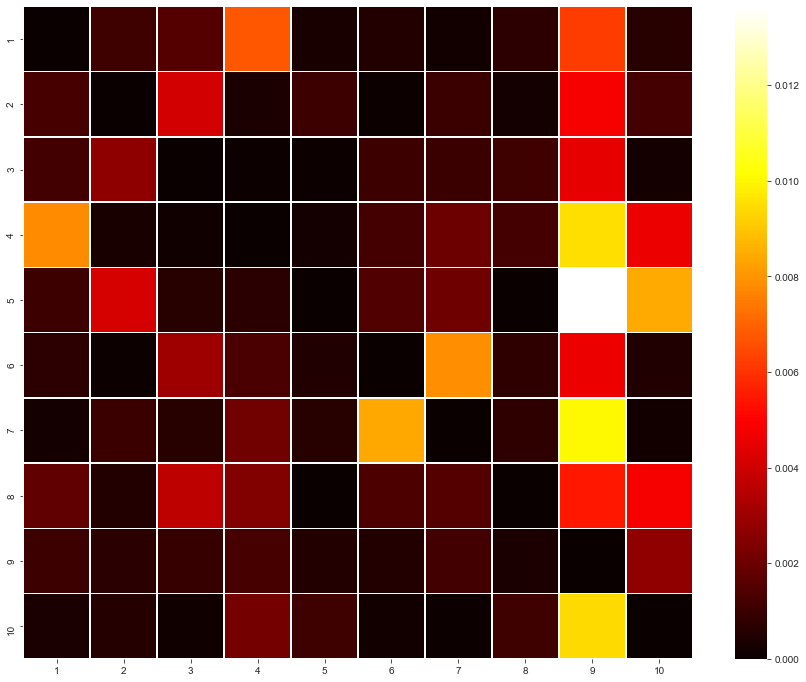

In [66]:
plt.figure(figsize = (15,12))
x_axis_labels=[1,2,3,4,5,6,7,8,9,10]
y_axis_labels=[1,2,3,4,5,6,7,8,9,10]
ax = sns.heatmap(trans_mats_comb_diag_zero,cmap='hot', linewidth=0.5,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

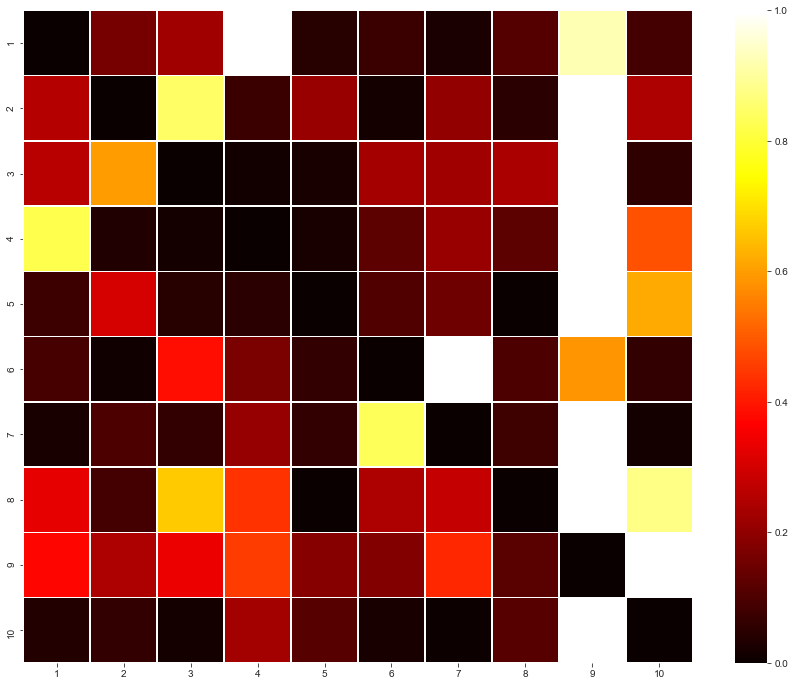

In [67]:
trans_mats_comb_diag_zero_norm=trans_mats_comb_diag_zero.copy()

for i in range(10):
    row_max=np.max(trans_mats_comb_diag_zero_norm[i,:])
    for j in range(10):
        trans_mats_comb_diag_zero_norm[i,j]=trans_mats_comb_diag_zero_norm[i,j]/row_max
        
plt.figure(figsize = (15,12))
x_axis_labels=[1,2,3,4,5,6,7,8,9,10]
y_axis_labels=[1,2,3,4,5,6,7,8,9,10]
ax = sns.heatmap(trans_mats_comb_diag_zero_norm,cmap='hot', linewidth=0.5,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

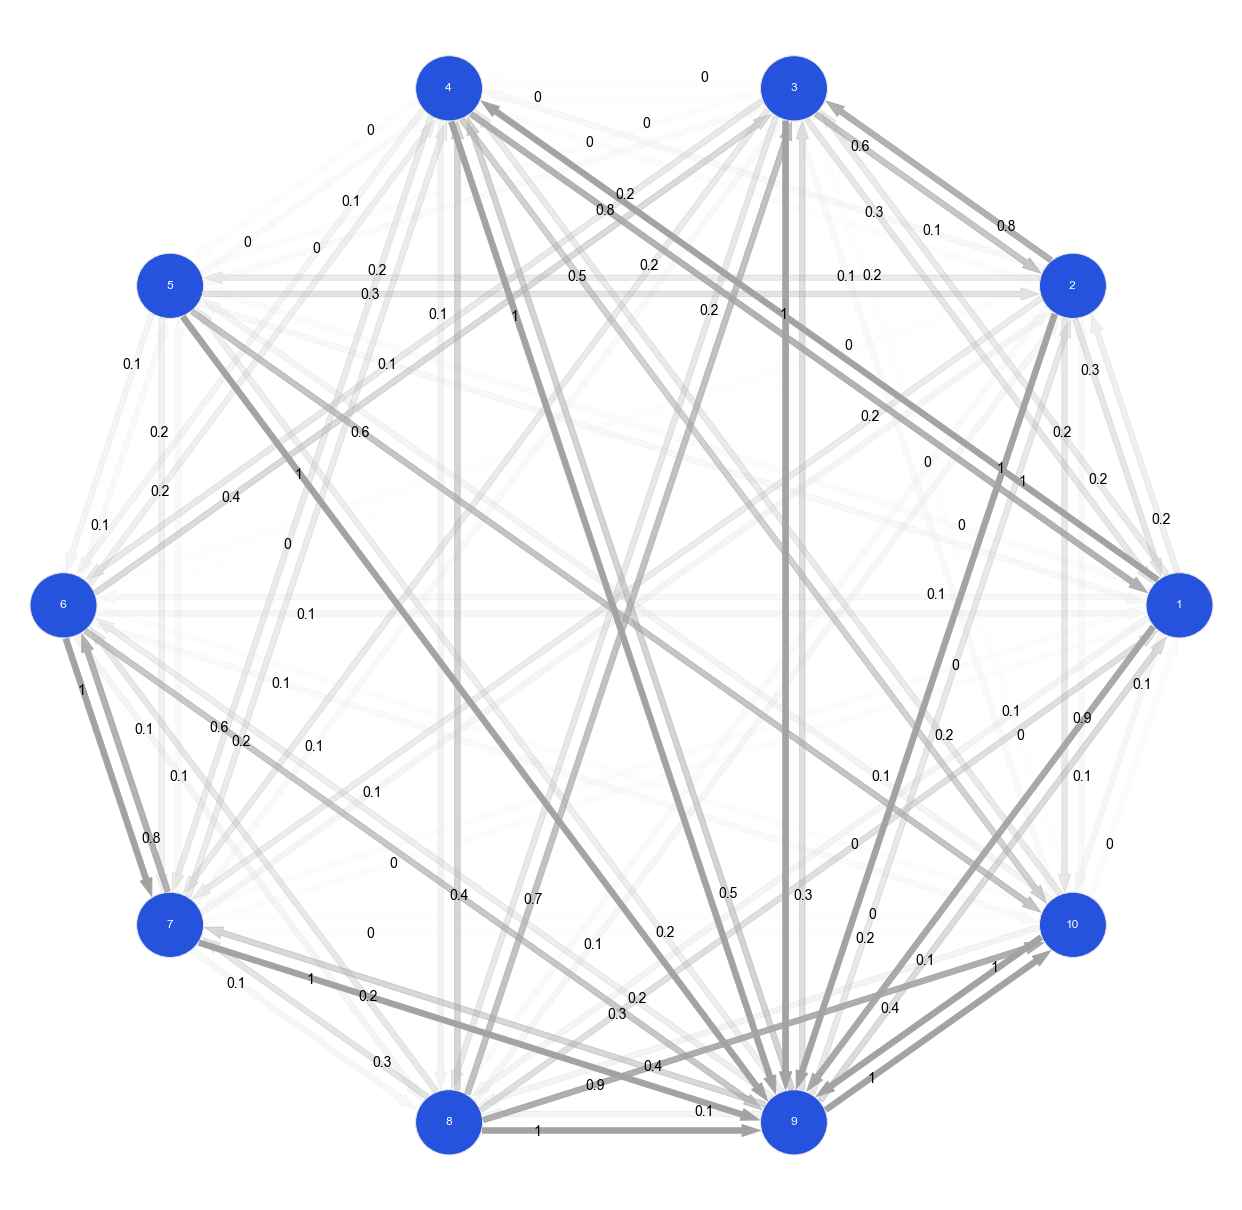

In [62]:
from markovchain import MarkovChain

P=trans_mats_comb_diag_zero_norm
#P = np.array([[0.8, 0.2], [0.1, 0.9]]) # Transition matrix
mc = MarkovChain(P, ['1', '2','3','4','5','6','7','8','9','10'])
mc.draw('G:\\uobrainflex_analysis_2022\\A1V1M2\\trans_mat_maps\\outs\\markov-chain-ten-states.png')

In [ ]:
# Generate fake dataset
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(50, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

# Define annotation and plot
row_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True),
                            AB=anno_simple(df.AB,add_text=True),axis=1,
                            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'yellow', 'G': 'green'},add_text=True),
                            Exp=anno_boxplot(df_box, cmap='turbo'),
                            Scatter=anno_scatterplot(df_scatter), TMB_bar=anno_barplot(df_bar))
plt.figure(figsize=(6, 12))                         
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=row_ha, col_split=2, 
                       row_split=3, col_split_gap=0.5,row_split_gap=1,
                      tree_kws={'col_cmap': 'Set1', 'row_cmap': 'Dark2'})
plt.savefig("heatmap.pdf", bbox_inches='tight')
plt.show()

#https://github.com/DingWB/PyComplexHeatmap/blob/main/notebooks/examples.ipynb